In [ ]:
# plot image features from csv file ./all_new_features_hier_norm.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./all_new_features_hier_norm.csv')
# df = df.drop(['Unnamed: 0'], axis=1)


In [2]:
df.describe()


,Mobilnet_v1,Inception_v4,Resnet_v_152,kpSurf,brightnessAverageToPerceived,contrast,area_by_perim,aspect_ratio,edge_count,hue2
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.707474,0.707474,0.707474,-0.368159,-0.368159,-0.368159,-0.368159,-0.368159,2.208956,-0.368159
std,0.454927,0.454927,0.454927,0.000344,0.000344,0.000344,0.000344,0.000344,1.143359,0.000344
min,0.000000,0.000000,0.000000,-0.368590,-0.369215,-0.369080,-0.368221,-0.368307,-0.358523,-0.368162
25%,0.000000,0.000000,0.000000,-0.368410,-0.368345,-0.368368,-0.368213,-0.368278,1.337856,-0.368162
50%,1.000000,1.000000,1.000000,-0.368247,-0.368146,-0.368091,-0.368210,-0.368233,2.098800,-0.368162
75%,1.000000,1.000000,1.000000,-0.367917,-0.367965,-0.367901,-0.368207,-0.368134,3.003260,-0.368162
max,1.000000,1.000000,1.000000,-0.351625,-0.366946,-0.367435,-0.360699,-0.340277,7.733435,-0.312518


In [9]:
feat_df = df.iloc[:, 4:]
feat_df.drop(['edge_count','hue2'], axis=1, inplace=True)


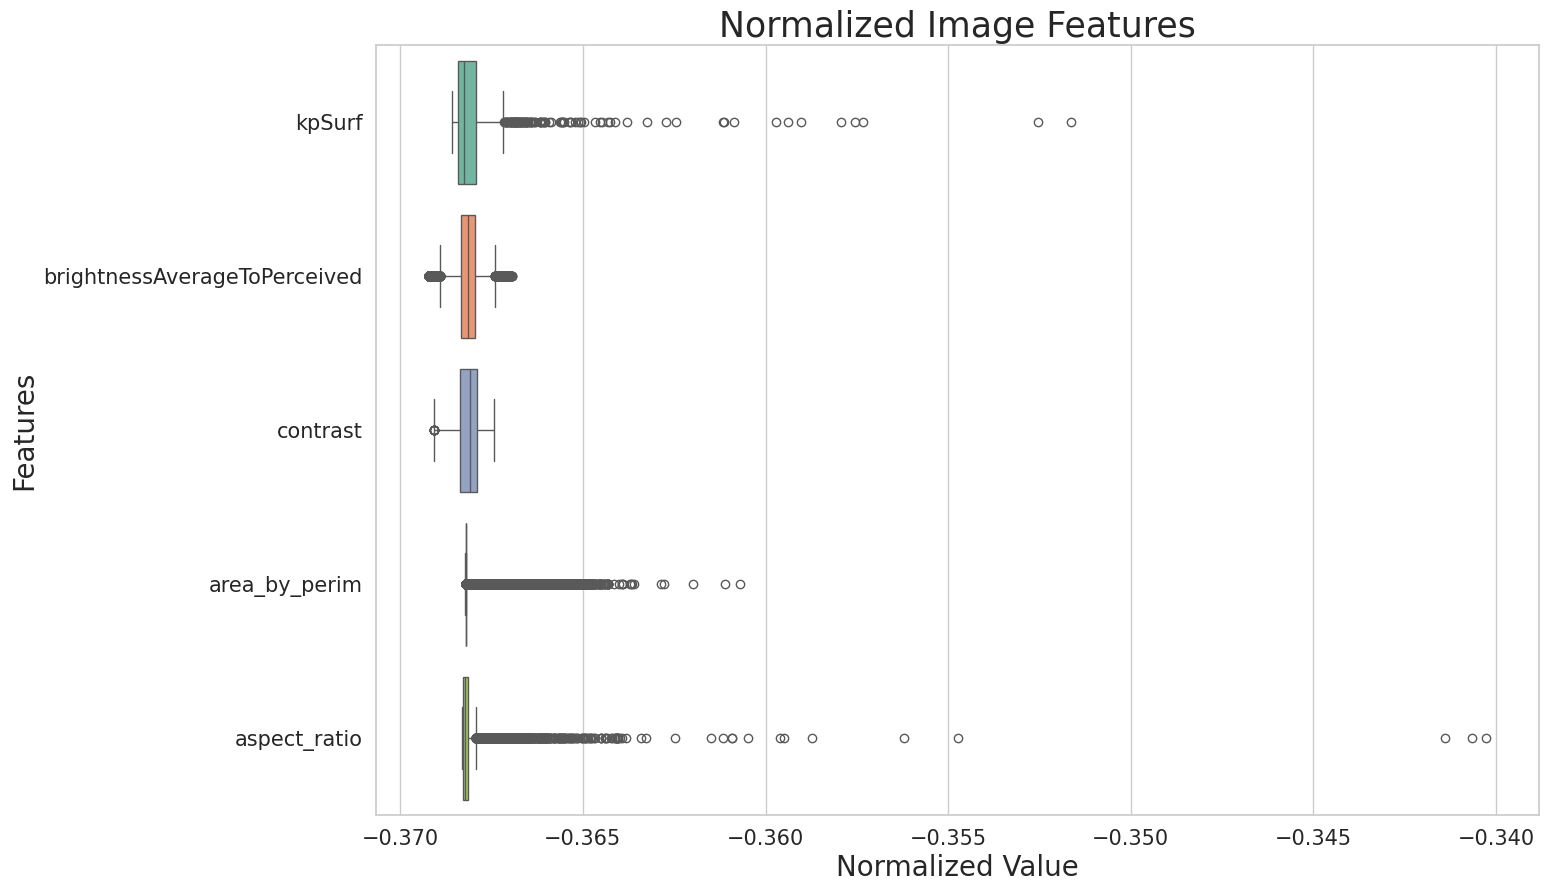

In [10]:

# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


In [15]:
feat_df = df.iloc[:, 4:]


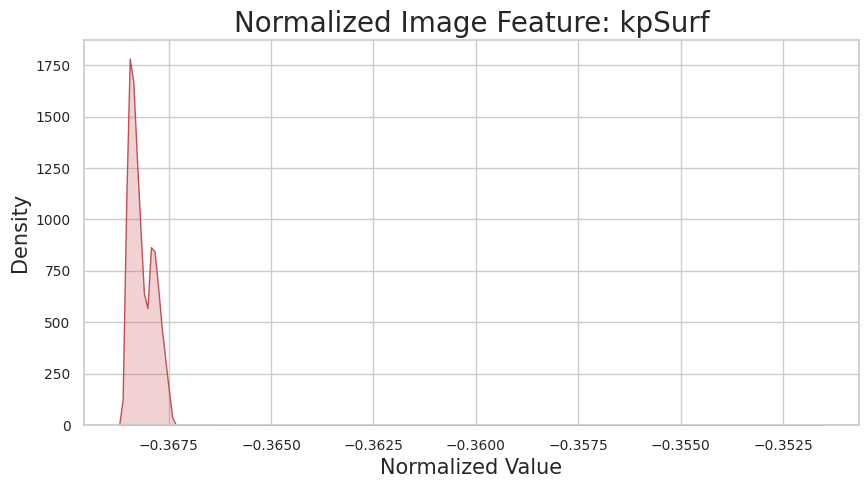

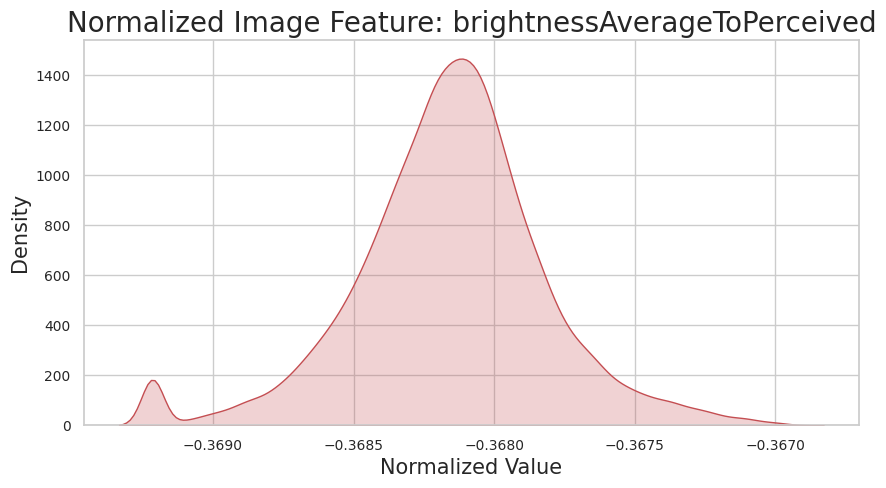

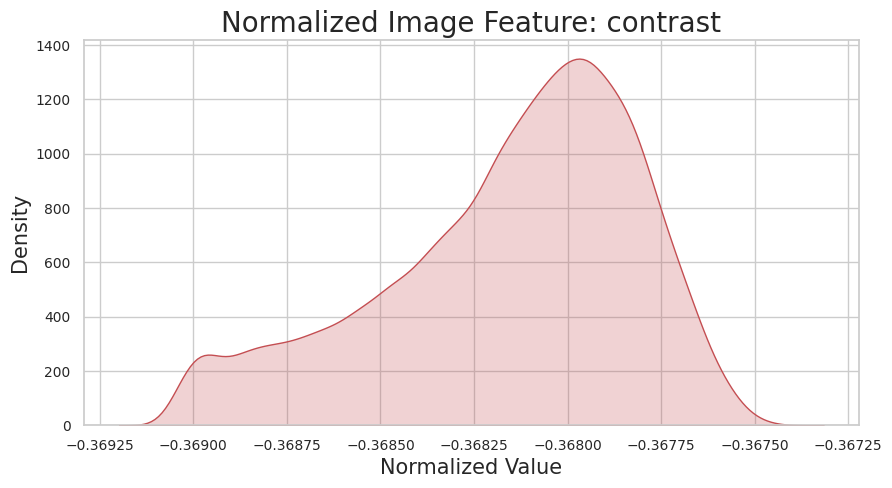

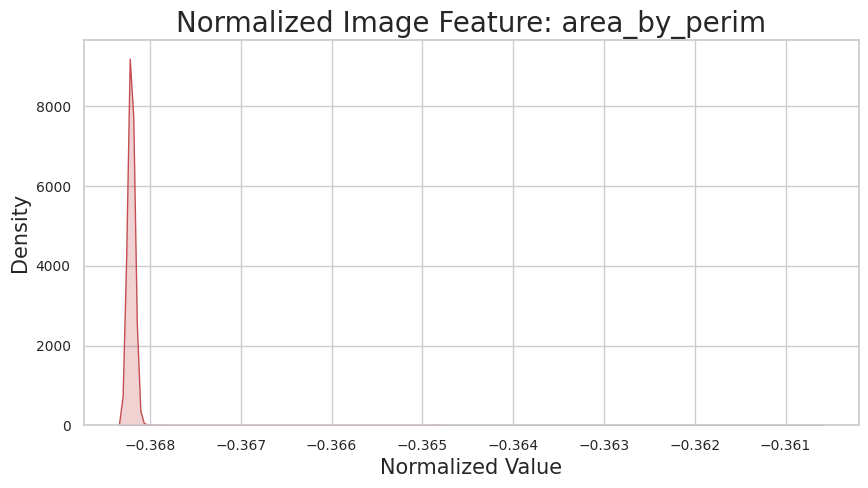

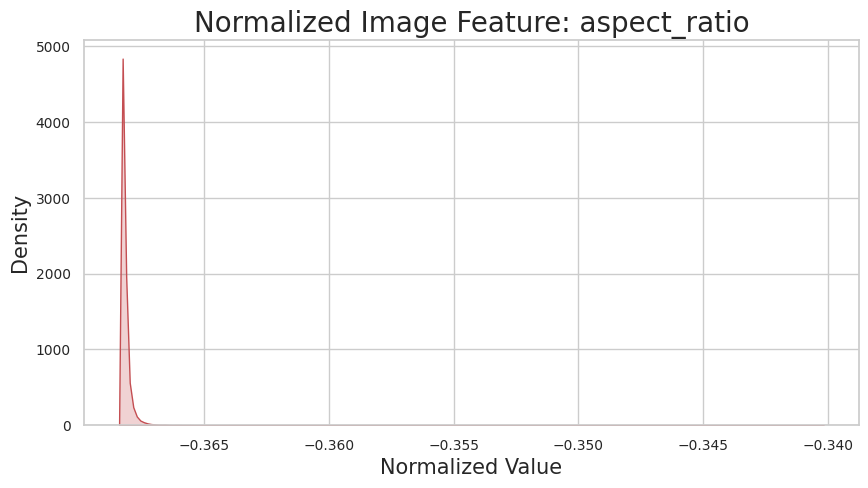

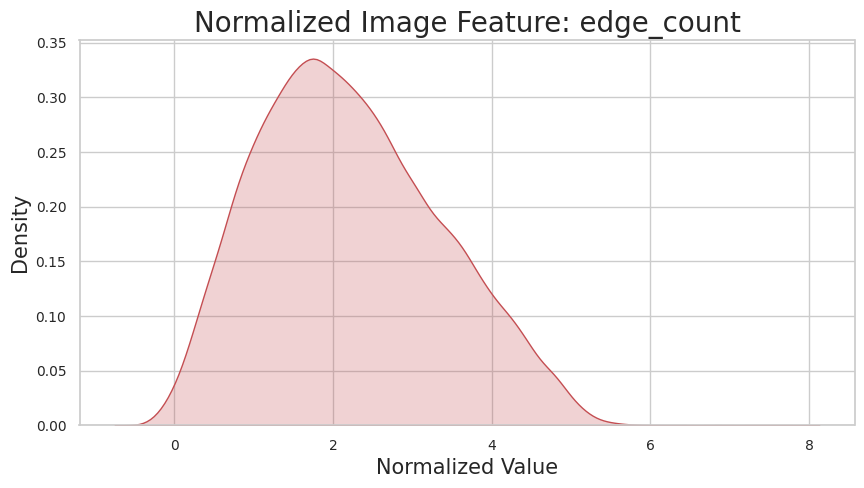

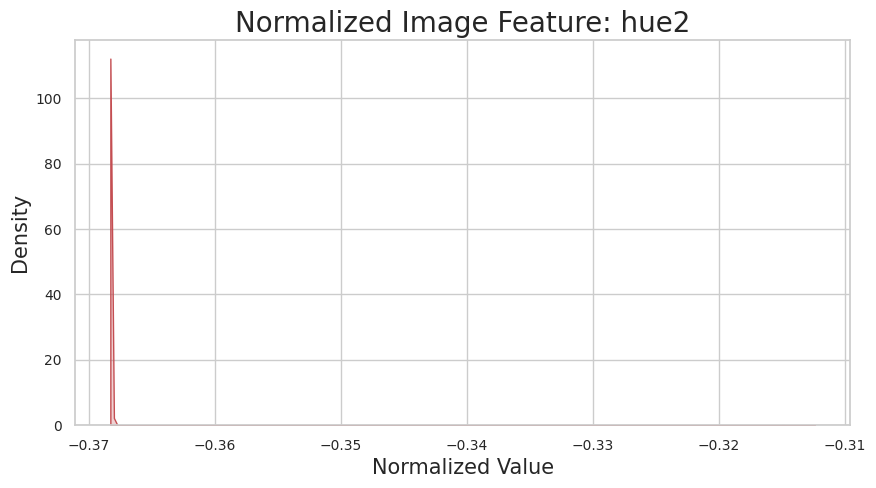

In [19]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Normalized Value', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Normalized Image Feature: '+col, fontsize=20)
    plt.show()


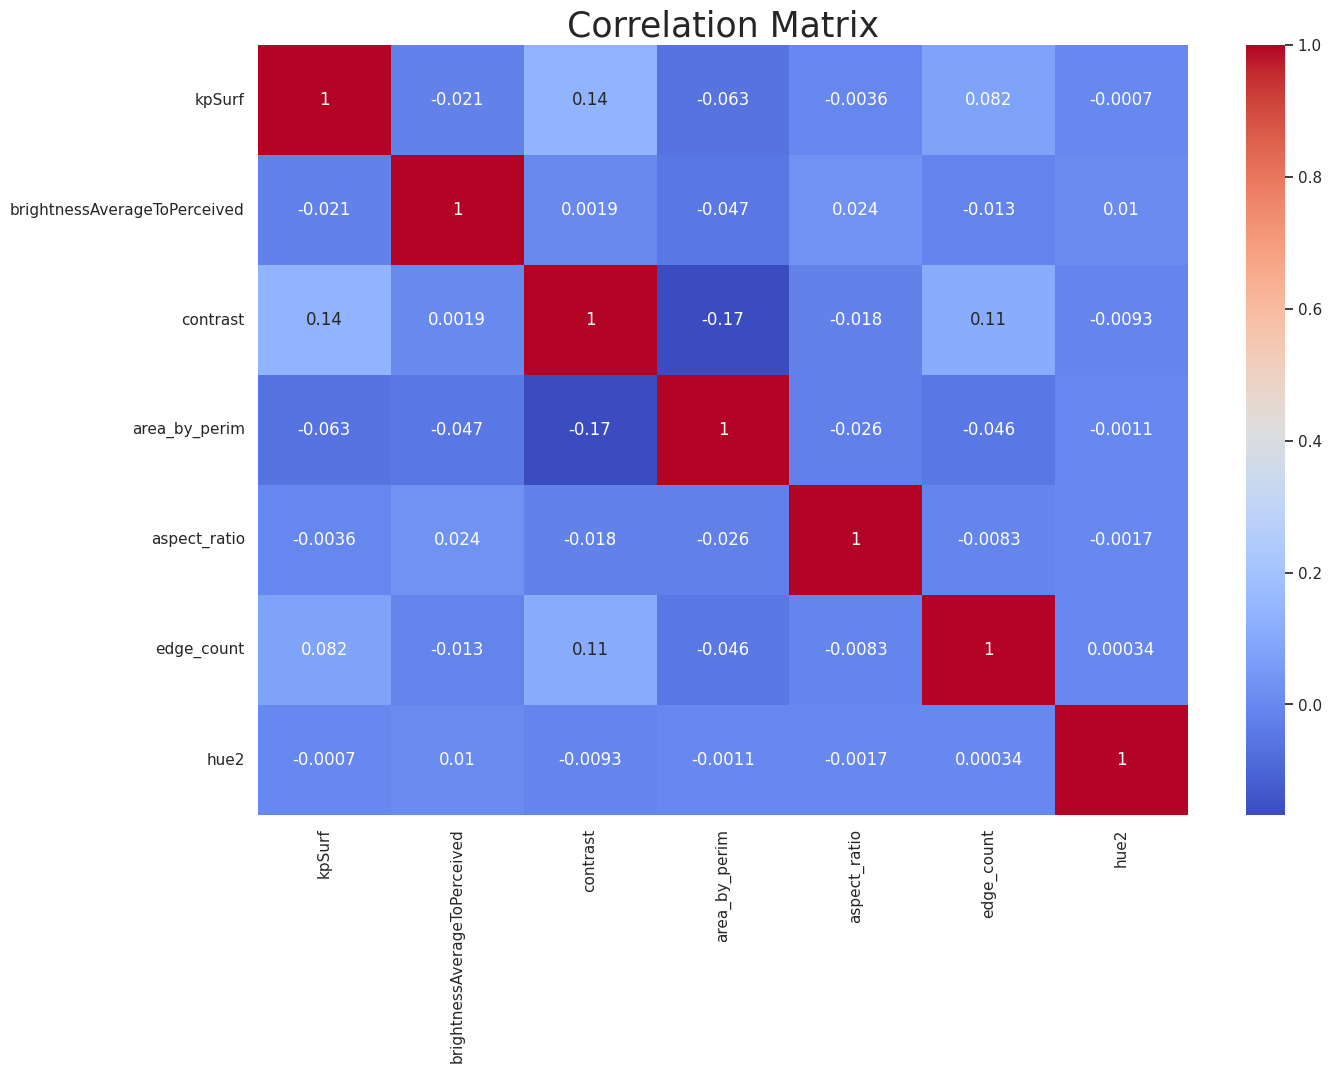

In [17]:
# plot correlation matrix
corr = feat_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25)
plt.show()


## Our feature analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./ilsvrc2012_features.csv')
df = df.drop(['filename'], axis=1)


In [30]:
df.describe()


,n_keypoints,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms,contrast,edge_length1,edge_length2,edge_length3,edge_length4,...,edge_angle7,area_by_perim,aspect_ratio,hue1,hue2,hue3,hue4,hue5,hue6,hue7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,484.716000,115.702850,130.971681,112.365013,127.948216,58.090569,75.12400,20.048000,6.949000,3.131000,...,2795.701000,107.804423,1.187141,9.884525e+04,38651.557000,11221.759000,15176.764000,32062.510000,5674.241000,12099.155000
std,55.607963,34.126089,31.900036,34.885140,33.074492,15.663082,88.64498,21.019313,7.659312,3.506014,...,2630.167483,29.023731,0.290043,1.611374e+05,50161.327961,19256.185285,25377.109067,54085.697602,23029.664013,21266.117392
min,2.000000,3.577035,8.803703,4.102801,9.957948,8.044253,0.00000,0.000000,0.000000,0.000000,...,0.000000,7.312492,0.324675,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,95.667179,111.963433,90.920854,107.627584,47.177851,25.00000,7.000000,2.000000,1.000000,...,1118.500000,102.683373,0.969500,3.990325e+04,7318.750000,1107.500000,927.250000,2304.250000,549.000000,1451.500000
50%,500.000000,115.946350,130.763760,112.451243,127.275997,57.885007,54.00000,14.000000,5.000000,2.000000,...,2196.500000,106.887743,1.333333,7.599300e+04,22058.500000,4412.500000,5480.500000,14990.500000,1962.000000,4997.000000
75%,500.000000,135.136612,149.291390,131.921816,147.409440,68.739305,95.00000,26.000000,9.000000,4.000000,...,3730.250000,109.626097,1.333333,1.311338e+05,50452.750000,12315.000000,18064.750000,43316.250000,5540.000000,13470.250000
max,500.000000,232.524115,234.901593,231.102450,233.918584,111.138424,1102.00000,237.000000,61.000000,29.000000,...,39626.000000,555.035813,2.631579,4.460827e+06,623191.000000,168833.000000,173894.000000,763886.000000,671175.000000,245415.000000


In [31]:
# skip edge and hue columns
not_edge_hue_colnames = [c for c in df.columns if 'edge' not in c and 'hue' not in c]
feat_df = df[not_edge_hue_colnames]


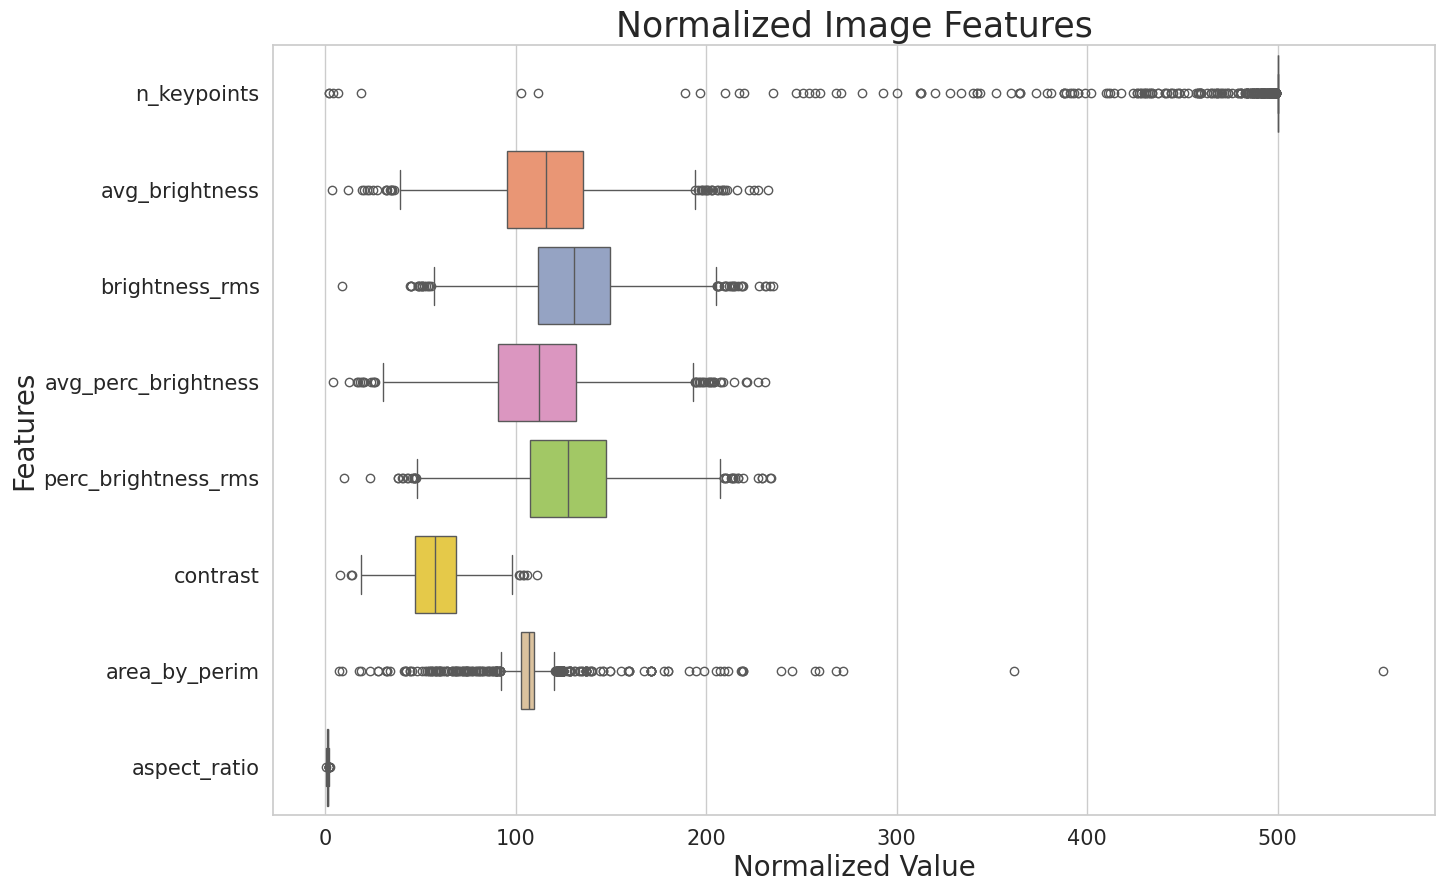

In [32]:
# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


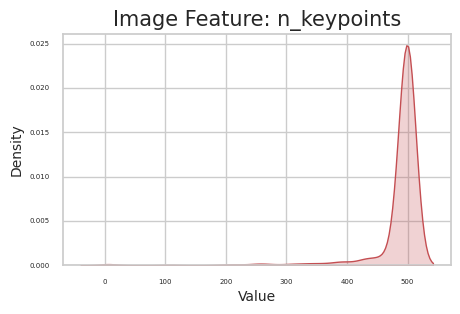

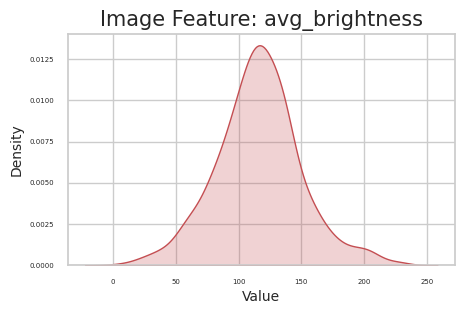

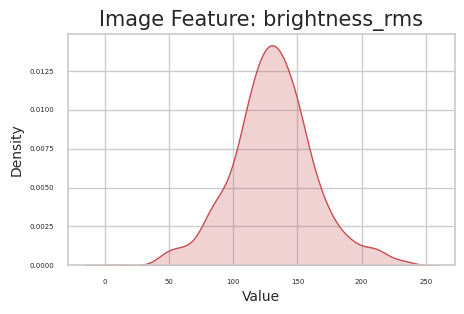

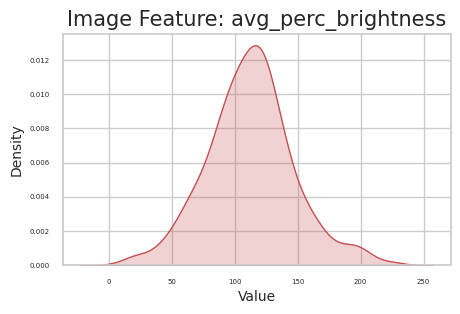

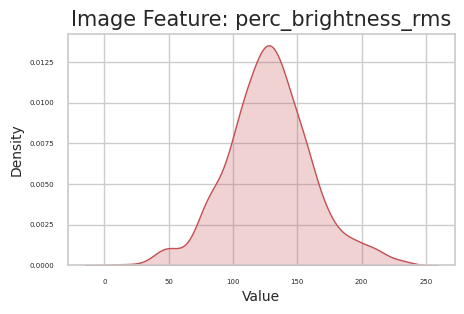

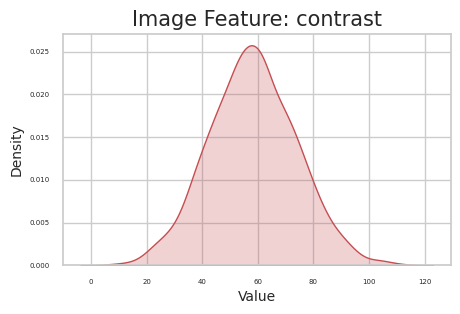

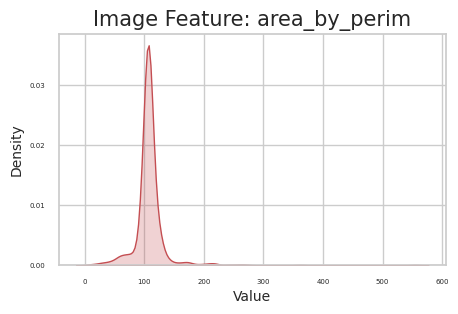

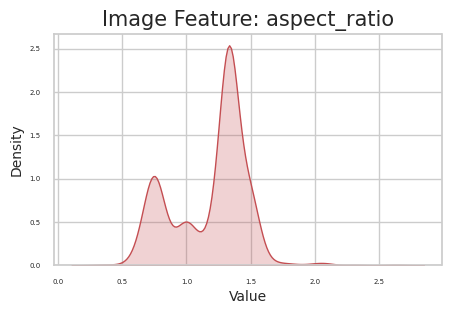

In [33]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Image Feature: '+col, fontsize=15)
    plt.show()


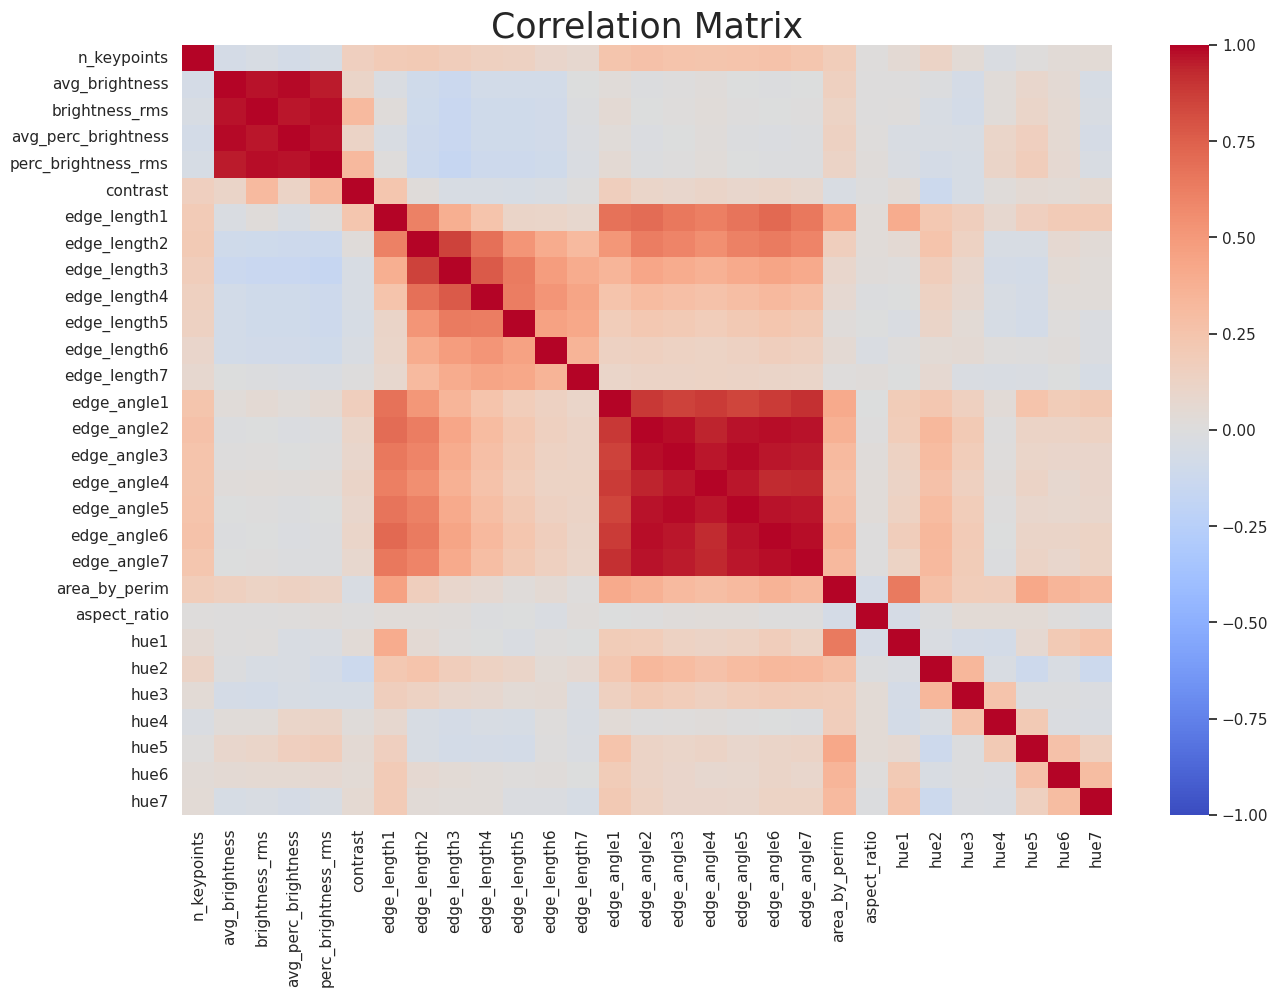

In [34]:
# plot correlation matrix without numbers
corr = df.corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=25)
plt.show()


In [39]:
print("Hue1 and Hue2 correlation: ", corr['hue1']['hue2'])
print("Edge angle 1 and Edge angle 2 correlation: ", corr['edge_angle1']['edge_angle2'])
print("Edge length 6 and Edge length 7 correlation: ", corr['edge_length6']['edge_length7'])
# avg_brightness , brightness_rms, avg_perc_brightness, perc_brightness_rms
print("Brightness correlation: ")
corr.iloc[1:5, 1:5]


Hue1 and Hue2 correlation:  -0.02649096771089712
Edge angle 1 and Edge angle 2 correlation:  0.8844619709874066
Edge length 6 and Edge length 7 correlation:  0.35343577342117416
Brightness correlation: 


,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms
avg_brightness,1.000000,0.975129,0.985454,0.956686
brightness_rms,0.975129,1.000000,0.964621,0.983972
avg_perc_brightness,0.985454,0.964621,1.000000,0.976157
perc_brightness_rms,0.956686,0.983972,0.976157,1.000000


## Machine translation feature analysis

In [1]:
# load data
import pandas as pd
df = pd.read_csv('./wmt16_features.csv')
df.columns


Index(['n_words', 'n_tokens', 'avg_noun', 'avg_verb', 'avg_adj', 'avg_sat_adj',
       'avg_adverb', 'avg_punc', 'avg_word_length', 'bow_0',
       ...
       'bow_7754', 'bow_7755', 'bow_7756', 'bow_7757', 'bow_7758', 'bow_7759',
       'bow_7760', 'bow_7761', 'bow_7762', 'bow_7763'],
      dtype='object', length=7773)

In [2]:
bow_cols = [c for c in df.columns if 'bow' in c]
df_no_bow = df.drop(bow_cols, axis=1)
df_no_bow.describe()


,n_words,n_tokens,avg_noun,avg_verb,avg_adj,avg_sat_adj,avg_adverb,avg_punc,avg_word_length
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.568400,28.330200,0.162311,0.095681,0.064132,0.064132,0.042207,0.105872,4.245030
std,17.653126,17.484299,0.072902,0.049290,0.051943,0.051943,0.046914,0.066552,0.620135
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,16.000000,0.117647,0.066667,0.025641,0.025641,0.000000,0.066667,3.888365
50%,26.000000,24.000000,0.161290,0.095238,0.060000,0.060000,0.033333,0.093750,4.270270
75%,38.000000,37.000000,0.206897,0.125000,0.095238,0.095238,0.066667,0.125440,4.645161
max,149.000000,148.000000,0.666667,0.400000,0.333333,0.333333,0.333333,0.625000,6.545455


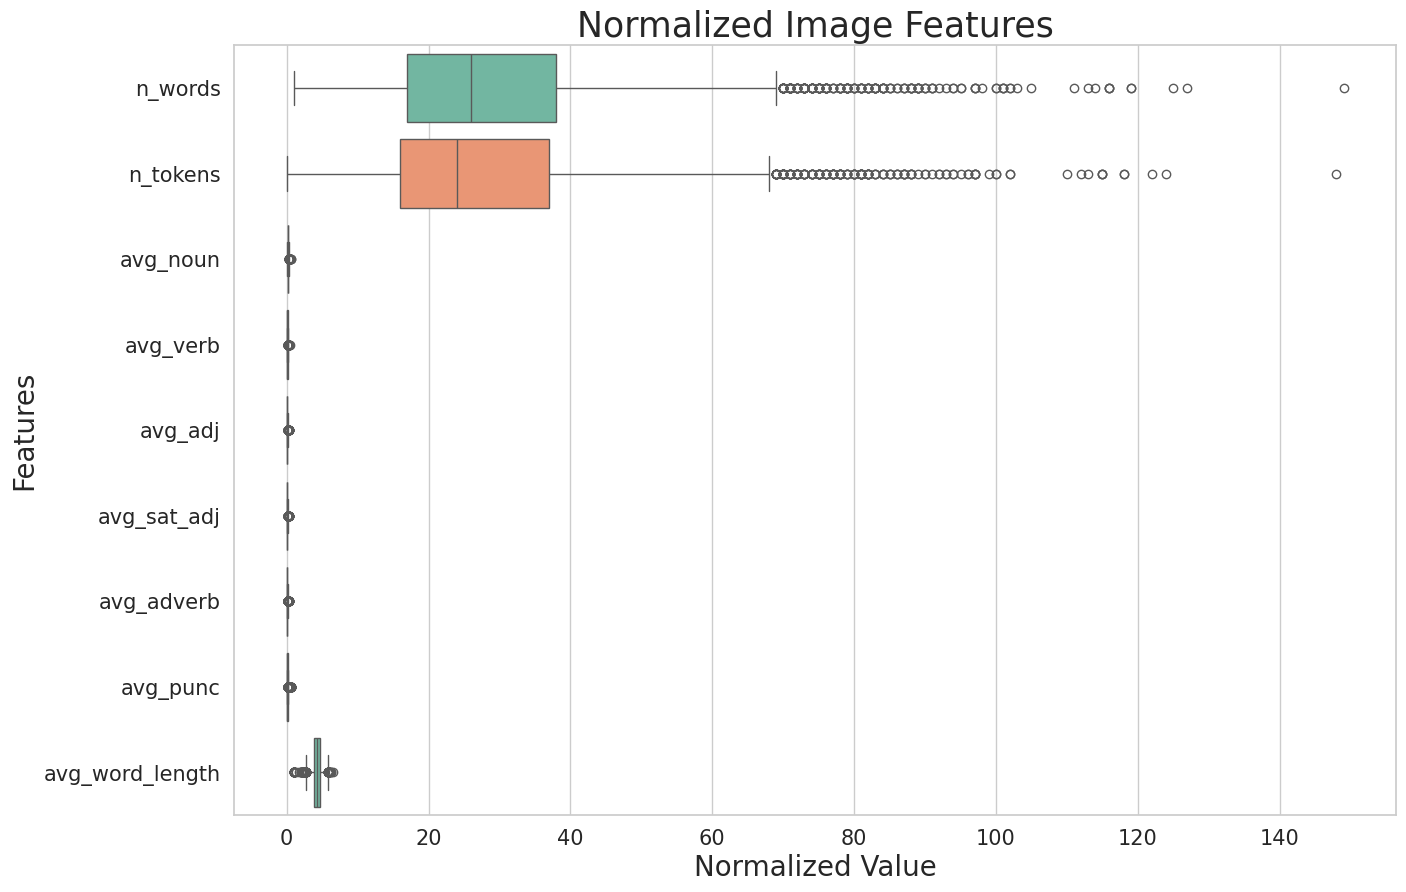

In [3]:
# plot boxplot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df_no_bow, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


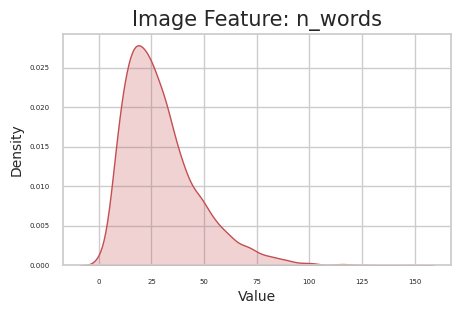

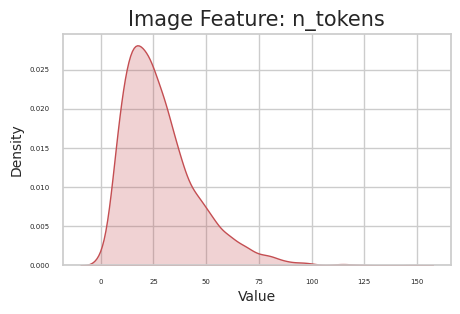

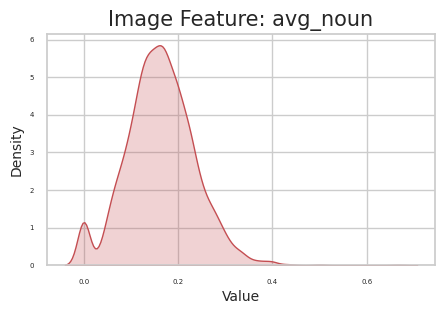

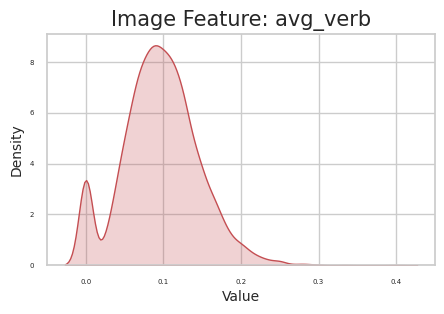

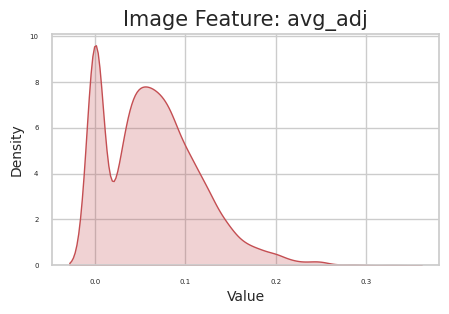

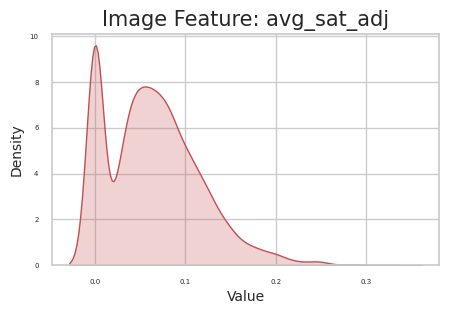

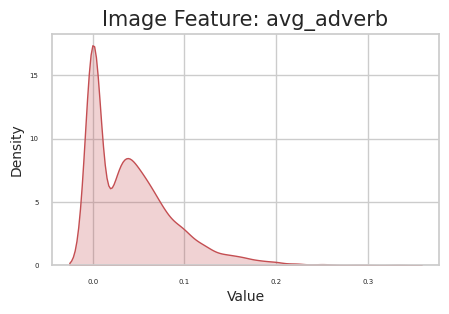

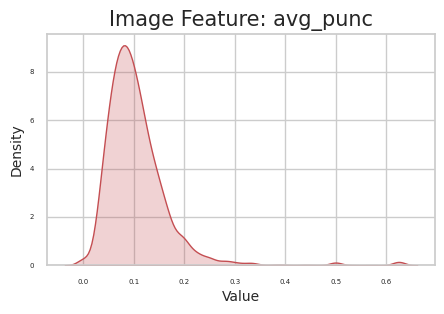

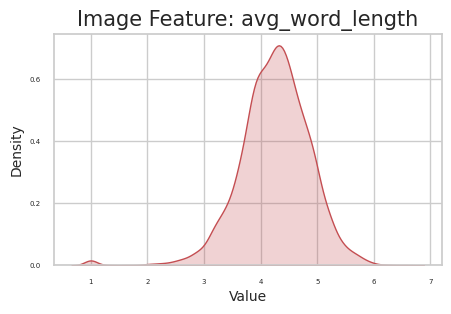

In [4]:
# kde for each feature
for col in df_no_bow.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(df_no_bow[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Image Feature: '+col, fontsize=15)
    plt.show()


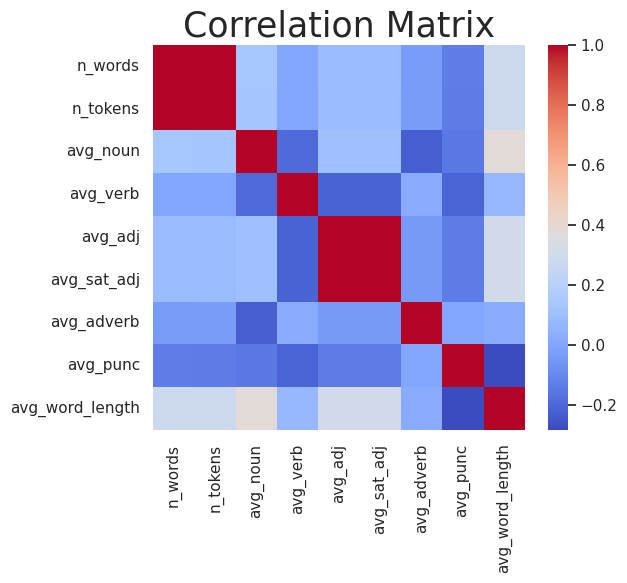

In [5]:
# correlation matrix
corr = df_no_bow.corr(method='pearson')
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25)
plt.show()


In [ ]:
# chi2 on bow features
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df[bow_cols]
y = df['score']

chi2score = chi2(X, y)[0]
# select 1500 features with highest chi2 score
k = 1500
kbest = SelectKBest(chi2, k=k).fit(X, y)
kbest_cols = kbest.get_support(indices=True)
kbest_scores = kbest.scores_[kbest_cols]
kbest_features = X.columns[kbest_cols]
kbest_df = pd.DataFrame({'feature': kbest_features, 'score': kbest_scores})
kbest_df.sort_values('score', ascending=False, inplace=True)
kbest_df.head(10)
